In [1]:
# Specify inline plots for notebook
%matplotlib inline
from matplotlib.font_manager import FontProperties

# Libraries -- overkill for the time being
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os, datetime

gcolour=[0.9,0.5, 0.0];
ngcolour=[0.9, 0.6, 0.0];
scolour=[0.6, 0.2, 0];
jcolour=[0.25, 1.0, 0.0];
pjcolour=[0.0, 0.5, 0.0];
pjgcolour=[0.2, 0.5, 0.0];
pcolour=[0.5, 0.5, 1.0];
mcolour=[0.0, 0.0, 0.6];
siteColors = [mcolour, pcolour, pjcolour, jcolour, scolour, gcolour]

amfluxDir = '/home/nikko/Research/Data/TowerData/AmerifluxFiles/Products/DailyGreg/'

VCMf_header = pd.read_csv(amfluxDir + 'US-Vcm_2007_2015_daily.txt', sep ='\t').columns
VCMf = pd.read_csv(amfluxDir + 'US-Vcm_2007_2015_daily.txt', sep ='\t', skiprows=1)
VCMf.columns = VCMf_header
VCMf['SITE'] = 'vcm'

VCPf_header = pd.read_csv(amfluxDir + 'US-Vcp_2007_2015_daily.txt', sep ='\t').columns
VCPf = pd.read_csv(amfluxDir + 'US-Vcp_2007_2015_daily.txt', sep ='\t', skiprows=1)
VCPf.columns = VCPf_header
VCPf['SITE'] = 'vcp'

MPJf_header = pd.read_csv(amfluxDir + 'US-Mpj_2007_2015_daily.txt', sep ='\t').columns
MPJf = pd.read_csv(amfluxDir + 'US-Mpj_2007_2015_daily.txt', sep ='\t', skiprows=1)
MPJf.columns = MPJf_header
MPJf['SITE'] = 'mpj'

WJSf_header = pd.read_csv(amfluxDir + 'US-Wjs_2007_2015_daily.txt', sep ='\t').columns
WJSf = pd.read_csv(amfluxDir + 'US-Wjs_2007_2015_daily.txt', sep ='\t', skiprows=1)
WJSf.columns = WJSf_header
WJSf['SITE'] = 'wjs'

SESf_header = pd.read_csv(amfluxDir + 'US-Ses_2007_2015_daily.txt', sep ='\t').columns
SESf = pd.read_csv(amfluxDir + 'US-Ses_2007_2015_daily.txt', sep ='\t', skiprows=1)
SESf.columns = SESf_header
SESf['SITE'] = 'ses'

SEGf_header = pd.read_csv(amfluxDir + 'US-Seg_2007_2015_daily.txt', sep ='\t').columns
SEGf = pd.read_csv(amfluxDir + 'US-Seg_2007_2015_daily.txt', sep ='\t', skiprows=1)
SEGf.columns = SEGf_header
SEGf['SITE'] = 'seg'

fluxdata = pd.concat([VCMf, VCPf, MPJf, WJSf, SESf, SEGf], ignore_index=True)
fluxdata[fluxdata == -9999] = np.nan

# Create a pandas timestamp for the combined dataframe
dateindex = []
yeardoy = []
fluxdata["doy"] = fluxdata["doy"].map("{:03}".format)
for row in fluxdata.index:
    yeardoy.append(str(fluxdata.year[row]) + str(fluxdata.doy[row]))
fluxdata['yeardoy'] = yeardoy

for date in fluxdata.yeardoy:
    dateindex.append(datetime.datetime.strptime(date, '%Y%j'))
fluxdata.index = dateindex

fluxdata['DOY'] = fluxdata.index.dayofyear
fluxdata['YEAR'] = fluxdata.index.year

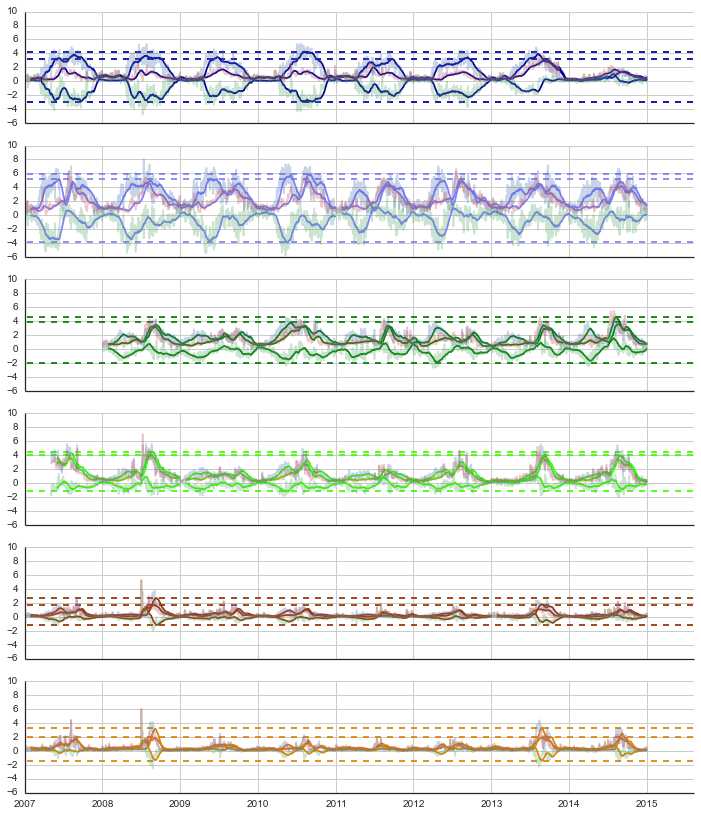

In [29]:
order = ['vcm','vcp','mpj','wjs','ses','seg']
fig, (ax) = plt.subplots(6,1, figsize=(12,14), sharex = True, sharey = True)
axs = fig.axes
idx = 0
sitemaxes = []
sitemaxesnee = []
sitemaxesre = []

for site in order:
    ax = axs[idx]
    pd.rolling_mean(fluxdata[fluxdata.SITE == site].GPP, 30).plot(ax = ax, 
                color = siteColors[idx])
    pd.rolling_mean(fluxdata[fluxdata.SITE == site].FC_F, 30).plot(ax = ax, 
            color = siteColors[idx])
    pd.rolling_mean(fluxdata[fluxdata.SITE == site].RECO, 30).plot(ax = ax, 
                color = siteColors[idx])

    siteMax = (pd.rolling_mean(fluxdata[fluxdata.SITE == site].GPP, 30)).max()
    siteMaxnee = (pd.rolling_mean(fluxdata[fluxdata.SITE == site].FC_F, 30)).min()
    siteMaxre = (pd.rolling_mean(fluxdata[fluxdata.SITE == site].RECO, 30)).max()

    fluxdata[fluxdata.SITE == site].GPP.plot(alpha = 0.3, ax = ax)
    fluxdata[fluxdata.SITE == site].FC_F.plot(alpha = 0.3, ax = ax)
    fluxdata[fluxdata.SITE == site].RECO.plot(alpha = 0.3, ax = ax)

    sitemaxes.append(siteMax)
    sitemaxesnee.append(siteMaxnee)
    sitemaxesre.append(siteMaxre)

    ax.hlines(siteMax, 0,100000, color = siteColors[idx], linestyle= '--')
    ax.hlines(siteMaxnee, 0,100000, color = siteColors[idx], linestyle= '--')
    ax.hlines(siteMaxre, 0,100000, color = siteColors[idx], linestyle= '--')

    idx = idx + 1
sns.despine()
sns.set_style('white')


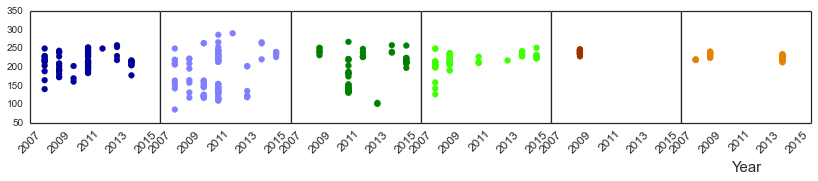

In [20]:
fig, (ax) = plt.subplots(1,6, figsize=(14,2), sharex = True, sharey = True)
plt.subplots_adjust(wspace = 0, hspace = 0)
axs = fig.axes
idx = 0
for site in order:
    ax = axs[idx]
    sitesub = fluxdata[fluxdata.SITE == site]
    ax.scatter(x = sitesub[sitesub.GPP > sitemaxes[idx]].YEAR, 
               y = sitesub[sitesub.GPP > sitemaxes[idx]].DOY, 
               marker = 'o', s = 35, color = siteColors[idx])
    ax.set_xticklabels(['2007',' ','2009',' ','2011',
                        ' ','2013',' ','2015'], 
                       fontsize = 12, rotation = 45)
    idx = idx + 1
ax.set_xlabel('Year', fontsize = 15)


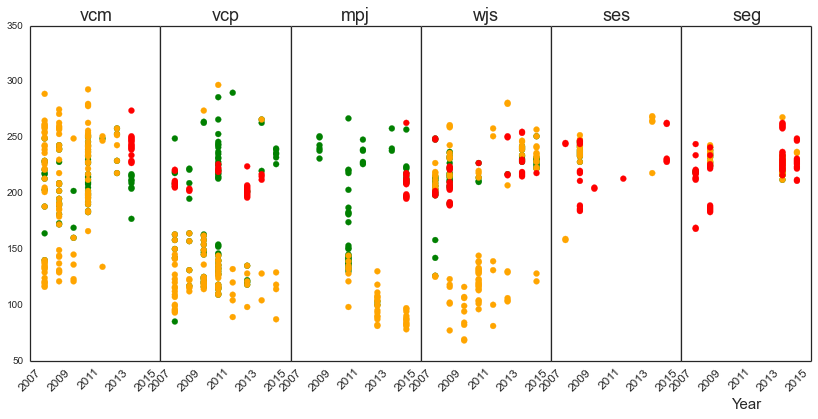

In [36]:
fig, (ax) = plt.subplots(1,6, figsize=(14,6), sharex = True, sharey = True)
plt.subplots_adjust(wspace = 0, hspace = 0)
axs = fig.axes
idx = 0
for site in order:
    ax = axs[idx]
    sitesub = fluxdata[fluxdata.SITE == site]
    ax.scatter(x = sitesub[sitesub.GPP > sitemaxes[idx]].YEAR, 
               y = sitesub[sitesub.GPP > sitemaxes[idx]].DOY, 
               marker = 'o', s = 35, color = 'green')
    ax.scatter(x = sitesub[sitesub.FC_F < sitemaxesnee[idx]].YEAR, 
               y = sitesub[sitesub.FC_F < sitemaxesnee[idx]].DOY, 
               marker = 'o', s = 35, color = 'orange')
    ax.scatter(x = sitesub[sitesub.RECO > sitemaxesre[idx]].YEAR, 
               y = sitesub[sitesub.RECO > sitemaxesre[idx]].DOY, 
               marker = 'o', s = 35, color = 'red')

    ax.set_xticklabels(['2007',' ','2009',' ','2011',
                        ' ','2013',' ','2015'], 
                       fontsize = 12, rotation = 45)
    ax.set_title(site, fontsize = 18)
    idx = idx + 1
ax.set_xlabel('Year', fontsize = 15)

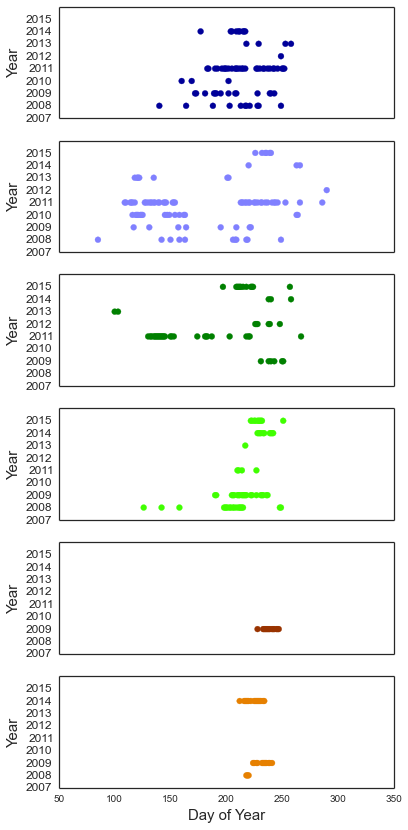

In [174]:
fig, (ax) = plt.subplots(6,1, figsize=(6,14), sharex = True, sharey = True)
axs = fig.axes
idx = 0
for site in order:
    ax = axs[idx]
    sitesub = fluxdata[fluxdata.SITE == site]
    ax.scatter(x = sitesub[sitesub.GPP > sitemaxes[idx]].DOY, 
               y = sitesub[sitesub.GPP > sitemaxes[idx]].YEAR, 
               marker = 'o', s = 35, color = siteColors[idx])
    ax.set_yticklabels(['2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015'], fontsize = 12)
    ax.set_ylabel('Year', fontsize = 15)
    idx = idx + 1
ax.set_xlabel('Day of Year', fontsize = 15)


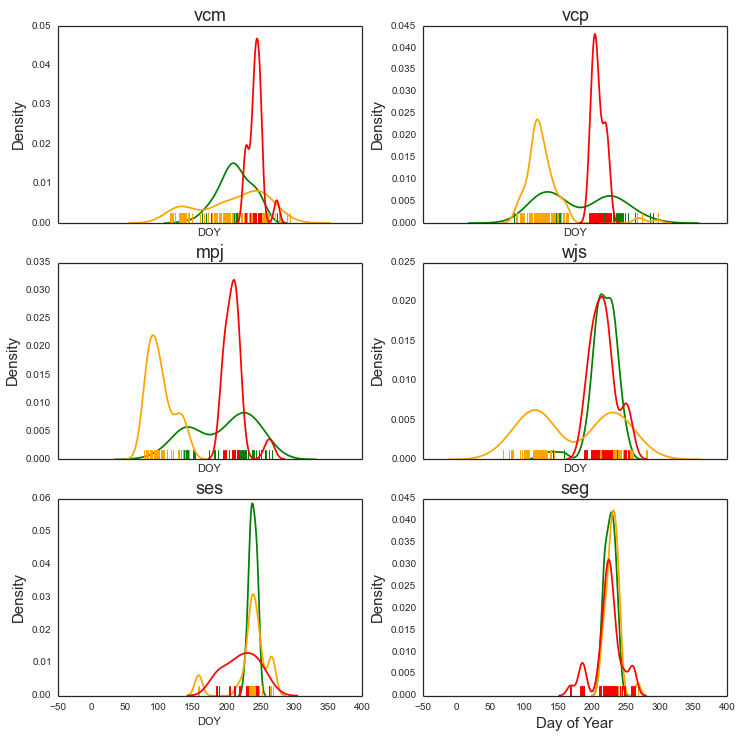

In [41]:
fig, (ax) = plt.subplots(3,2, figsize=(12,12), sharex = True)
axs = fig.axes
idx = 0
for site in order:
    ax = axs[idx]
    sitesub = fluxdata[fluxdata.SITE == site]
    sns.distplot(sitesub[sitesub.GPP > sitemaxes[idx]].DOY, 
                 hist=False, rug=True, color = 'green', 
                 ax = ax);
    sns.distplot(sitesub[sitesub.FC_F < sitemaxesnee[idx]].DOY, 
                 hist=False, rug=True, color = 'orange', ax = ax);
    sns.distplot(sitesub[sitesub.RECO > sitemaxesre[idx]].DOY, 
                 hist=False, rug=True, color = 'red', ax = ax);

    ax.set_ylabel('Density', fontsize = 15)
    ax.set_title(site, fontsize = 18)

    idx = idx + 1
ax.set_xlabel('Day of Year', fontsize = 15)


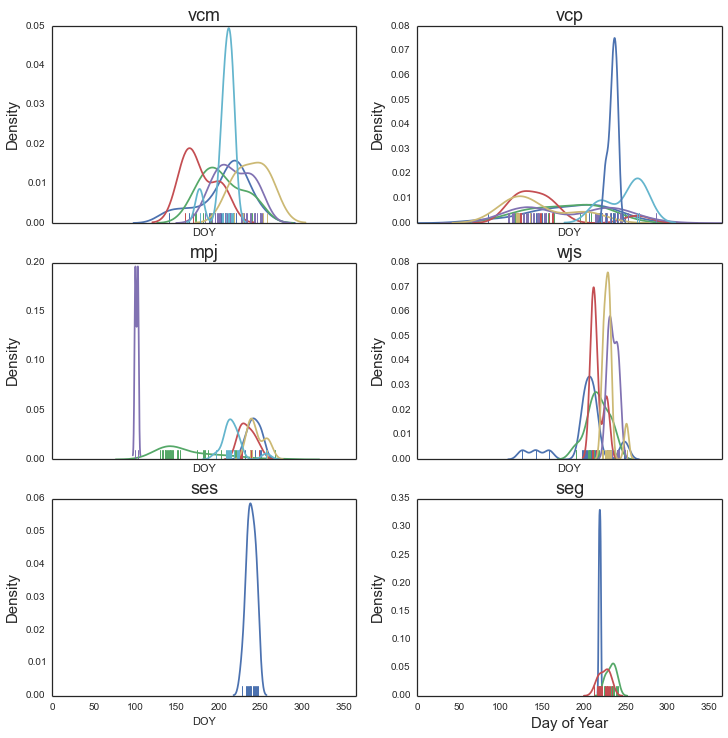

In [170]:
fig, (ax) = plt.subplots(3,2, figsize=(12,12), sharex = True)
axs = fig.axes
idx = 0
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
for site in order:
    ax = axs[idx]
    sitesub = fluxdata[fluxdata.SITE == site]
    for year in np.unique(sitesub[sitesub.GPP > sitemaxes[idx]].YEAR):
        yearsub = sitesub[sitesub.YEAR == year]
        if len(yearsub[yearsub.GPP > sitemaxes[idx]].DOY) > 1:
            sns.distplot(yearsub[yearsub.GPP > sitemaxes[idx]].DOY.dropna(), 
                         ax = ax, hist=False, rug=True);
    ax.set_ylabel('Density', fontsize = 15)
    ax.set_xlim([0,365])
    ax.set_title(site, fontsize = 18)
    idx = idx + 1
ax.set_xlabel('Day of Year', fontsize = 15)
